In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

# 0. Download and set dataset path
base_path = kagglehub.dataset_download("smeschke/four-shapes")
dataset_path = os.path.join(base_path, "shapes")  # Make sure to point to the folder with class subfolders

# 1. Data Preprocessing
img_size = 64
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# 2. Build the CNN model
model = Sequential([
    tf.keras.Input(shape=(img_size, img_size, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: circle, triangle, star, square
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 4. Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc:.2f}")

# 5. Prediction on a new image from file path
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())

    print(f"Predicted shape: {class_labels[class_index]}")

# Example usage:
# predict_image("path_to_new_image.png")


Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 159ms/step - accuracy: 0.8955 - loss: 0.2687 - val_accuracy: 1.0000 - val_loss: 6.7182e-04
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 139ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 9.4087e-06
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 140ms/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 5.1341e-07
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 140ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 4.9847e-07
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 138ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.7825e-09
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 144ms/step - accuracy: 0.9992 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 5.9966e-07
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 

FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


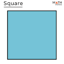

Predicted shape: square


In [ ]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
from io import BytesIO

def predict_uploaded_image(uploaded_file):
    img = Image.open(BytesIO(uploaded_file['content'])).convert('RGB')
    img = img.resize((img_size, img_size))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())

    display(img)
    print(f"Predicted shape: {class_labels[class_index]}")

uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(lambda change: [predict_uploaded_image(file) for file in uploader.value.values()], names='value')
display(uploader)
